# Solutions to some OpenAI Gym environments

In [1]:
import gym
import imageio
import numpy as np
import matplotlib.pyplot as plt

from agents.dqn import DQNAgent
from agents.networks import MultilayerPerceptron, AtariNetSmall
from environments.atari import AtariEnv

In [2]:
def make_gif(agent, env, filename, fps=60):
    """Save a GIF of the agent acting in the environment for one episode."""
    images = []

    state = env.reset()
    images.append(env.render(mode='rgb_array'))
    done = False
    while not done:
        action = agent.act(state)
        state, _, done, _ = env.step(action)
        images.append(env.render(mode='rgb_array'))

    imageio.mimsave(filename, images, fps=fps)

# CartPole

In [3]:
env = gym.make('CartPole-v0')
test_env = gym.make('CartPole-v0')
network = MultilayerPerceptron(4, [128], 2, final_activation='linear')
agent = DQNAgent(network, batch_size=64, decay_rate=0.995, double=True)

In [4]:
rewards = agent.train(env, 100, epochs=200, verbose=1, test_env=test_env, test_episodes=10, test_epsilon=0.05)

Epoch 200/200 - avg_reward: 200.0

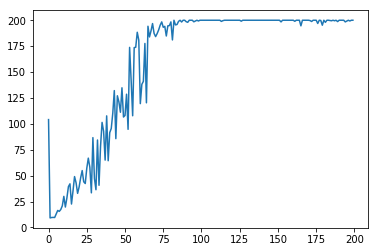

In [5]:
plt.plot(rewards)

In [6]:
env = gym.make('CartPole-v1')
test_env = gym.make('CartPole-v1')
network = MultilayerPerceptron(4, [128], 2, final_activation='linear')
agent = DQNAgent(network, batch_size=64, decay_rate=0.995, double=True)

In [7]:
rewards = agent.train(env, 100, epochs=400, verbose=1, test_env=test_env, test_episodes=10, test_epsilon=0.05)

Epoch 400/400 - avg_reward: 200.4

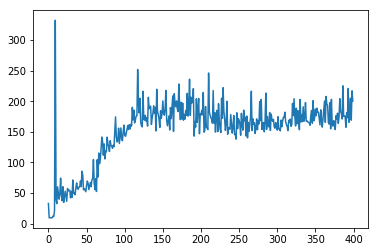

In [8]:
plt.plot(rewards)

# Acrobot

In [9]:
env = gym.make('Acrobot-v1')
test_env = gym.make('Acrobot-v1')
network = MultilayerPerceptron(6, [128], 3, final_activation='linear')
agent = DQNAgent(network, batch_size=64, decay_rate=0.999, double=True)

In [10]:
rewards = agent.train(env, 100, epochs=200, verbose=1, test_env=test_env, test_episodes=10, test_epsilon=0.05)

Epoch 200/200 - avg_reward: -139.0

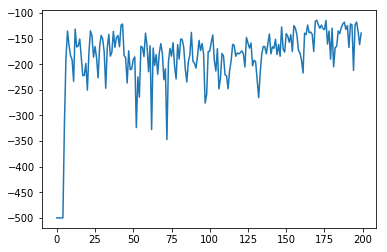

In [11]:
plt.plot(rewards)

# MountainCar

In [12]:
env = gym.make('MountainCar-v0')
test_env = gym.make('MountainCar-v0')
network = MultilayerPerceptron(2, [64], 3, final_activation='linear')
agent = DQNAgent(network, batch_size=64, decay_rate=0.999, double=True)

In [13]:
rewards = agent.train(env, 200, epochs=100, verbose=1, test_env=test_env, test_episodes=10, test_epsilon=0.05)

Epoch 100/100 - avg_reward: -156.8

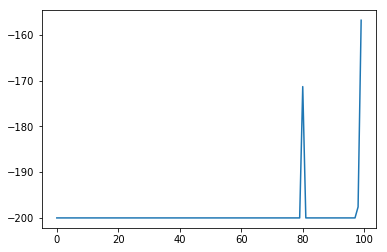

In [14]:
plt.plot(rewards)

# LunarLander

In [15]:
env = gym.make('LunarLander-v2')
test_env = gym.make('LunarLander-v2')
network = MultilayerPerceptron(8, [128], 4, final_activation='linear')
agent = DQNAgent(network, batch_size=64, start_steps=10000, decay_rate=0.9999, target_update_freq=1500, double=True)

In [16]:
rewards = agent.train(env, 500, epochs=500, verbose=1, test_env=test_env, test_episodes=10, test_epsilon=0.05)

Epoch 500/500 - avg_reward: -56.975521081837076

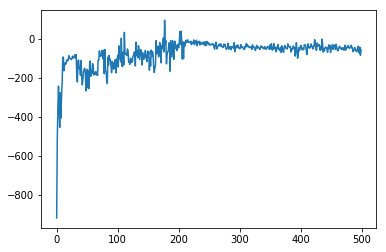

In [17]:
plt.plot(rewards)